In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [8]:
model_name = 'LeNet5'
dataset_name = 'MNIST'
init_param_path = '../src/checkpoints/init_param_' + model_name + '_' + dataset_name + '.pth'
final_param_path = '../src/checkpoints/final_param_' + model_name + '_' + dataset_name + '.pth'
init_param_dict = torch.load(init_param_path)
final_param_dict = torch.load(final_param_path)

In [9]:
for (key,layer_weights_tensor) in init_param_dict.items():
    print(key)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias
fc3.weight
fc3.bias


In [11]:
init_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in init_param_dict.items():
    if 'bias' not in key:
        print(key)
        init_weights_array = np.append(init_weights_array, layer_weights_tensor)

final_weights_array = np.zeros(0)
for (key,layer_weights_tensor) in final_param_dict.items():
    if 'bias' not in key:
        print(key)
        final_weights_array = np.append(final_weights_array, layer_weights_tensor)

conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight


In [12]:
init_weights_array.shape

(61470,)

In [13]:
final_weights_array.shape

(61470,)

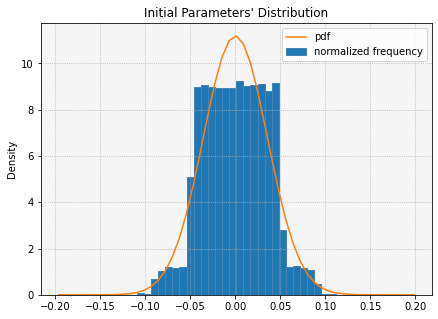

In [95]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(init_weights_array,bins=50)[1]
plt.hist(init_weights_array,bins=50, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(init_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Initial Parameters\' Distribution')
plt.show()
fig_name = 'init_weights_distribution_' + model_name + '_' + dataset_name + '.png'
fig.savefig(fig_name)

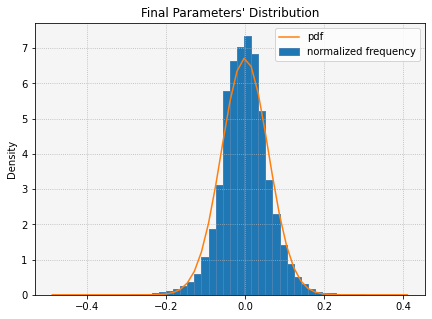

In [98]:
fig, ax = plt.subplots(figsize=(7,5),nrows=1, ncols=1)
fig.patch.set_facecolor('w')
ax.grid(linestyle='dotted')
ax.set_facecolor('whitesmoke')
ax.set_ylabel('Density')
bin_edges = np.histogram(final_weights_array,bins=50)[1]
plt.hist(final_weights_array,bins=50, edgecolor='steelblue',density=True, stacked=True)
loc, std = stats.norm.fit(final_weights_array)
plt.plot(bin_edges,stats.norm.pdf(bin_edges, loc=loc, scale=std))
ax.legend(['pdf','normalized frequency'])
ax.title.set_text('Final Parameters\' Distribution')
plt.show()
fig_name = 'final_weights_distribution_' + model_name + '_' + dataset_name + '.png'
fig.savefig(fig_name)

-----

(array([6.19215610e-03, 4.12810407e-03, 1.03202602e-02, 2.06405203e-03,
        8.25620814e-03, 6.19215610e-03, 2.06405203e-03, 4.12810407e-03,
        8.25620814e-03, 6.19215610e-03, 1.03202602e-02, 6.19215610e-02,
        5.57294049e-02, 7.03841744e-01, 1.03615412e+00, 1.19715018e+00,
        1.13935672e+00, 1.20540639e+00, 5.07343990e+00, 8.99926687e+00,
        9.08595706e+00, 8.97037014e+00, 8.93940936e+00, 8.94972962e+00,
        8.92496100e+00, 9.22631260e+00, 9.04054791e+00, 9.05293222e+00,
        9.10040542e+00, 8.81350219e+00, 9.13755836e+00, 2.80917482e+00,
        1.21366260e+00, 1.24462338e+00, 1.16206130e+00, 1.05473059e+00,
        4.52027396e-01, 5.16013009e-02, 4.54091448e-02, 4.12810407e-03,
        4.12810407e-03, 1.23843122e-02, 6.19215610e-03, 0.00000000e+00,
        4.12810407e-03, 6.19215610e-03, 4.12810407e-03, 8.25620814e-03,
        6.19215610e-03, 6.19215610e-03]),
 array([-0.19591485, -0.18803322, -0.18015159, -0.17226995, -0.16438832,
        -0.15650669, 

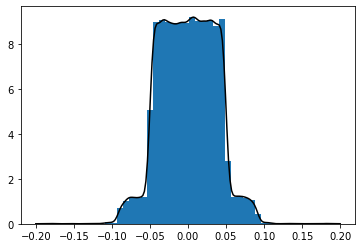

In [31]:
kde = stats.gaussian_kde(init_weights_array)
#visualize KDE
fig = plt.figure()
ax = fig.add_subplot(111)
x_eval = np.linspace(-.2, .2, num=200)
ax.plot(x_eval, kde(x_eval), 'k-')
ax.hist(init_weights_array,bins=50,density=True, stacked=True)

----

/Users/yifanlu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yifanlu/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

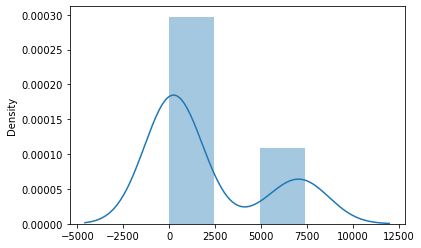

In [122]:
init_weights_bins = pd.cut(init_weights_array, 30)
#pd.value_counts(init_weights_bins)
#plt.figure(figsize=(10,10))
#plt.xlabel(init_weights_bins)
#pd.value_counts(init_weights_bins).sort_index().plot.bar()
#x = np.linspace(np.min(init_weights_array), np.max(init_weights_array), 100)
#plt.plot(x, stats.norm.pdf(x, np.mean(init_weights_array),np.std(init_weights_array)))
#pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.density()
#pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.bar()
#pd.value_counts(init_weights_bins,normalize=True).sort_index().plot.density()
#sns.distplot(pd.value_counts(init_weights_bins),kde_kws={"bw": 0.5})
#sns.displot(pd.value_counts(init_weights_bins), kde=True)

<AxesSubplot:ylabel='Density'>

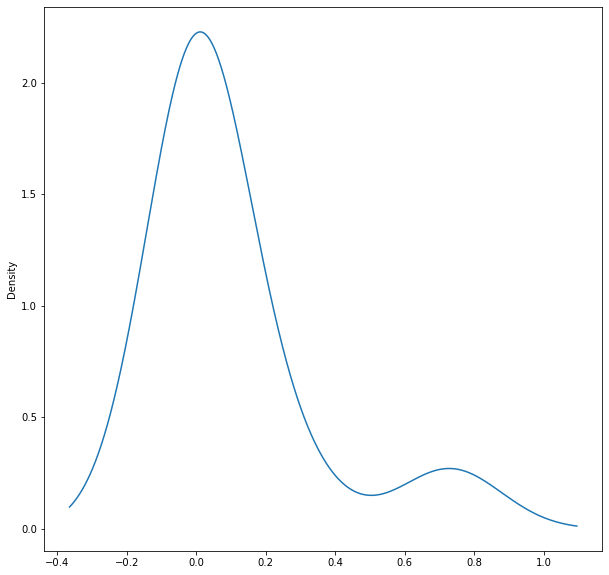

In [95]:
final_weights_bins = pd.cut(final_weights_array, 10)
plt.figure(figsize=(10,10))
#pd.value_counts(final_weights_bins).sort_index().plot.bar()
pd.value_counts(final_weights_bins,normalize=True).sort_index().plot.density()
#sns.distplot(pd.value_counts(final_weights_bins))